<table style="width:98%">
  <tr style="background-color:#FFFFFF">
    <td width ="59%">
        <h1 style="font-size:3vw;color:#A00000;text-align:center">
        Autonomous Soil Exploration System using Artificial Curiosity
        </h1>
        <h1 style="font-size:2vw;color:#A00000;text-align:center">
        <font style="font-family:Snell Roundhand, cursive;color:darkgreen">
            2D Rover Track
        </font>
        </h1>
        <h1 style="font-size:1.2vw;color:#A00000;text-align:center">
        Prof. Goren Gordon, Philippe Artsztein
        </h1>
    </td>
    <td width ="39%"><img src="./MyLogo.jpg" width="100%" height="100%" style="float:left;vertical-align:bottom;margin: 20px 20px"></td>
  </tr>
</table>

In [1]:
import General_Functions_v3 as gf
gf_Ver= gf.var()
import sys
Python_Ver= (str(sys.version_info.major)+"."
            +str(sys.version_info.major)+"."
            +str(sys.version_info.micro))
gf.Print_1H('Written Python Version =  3.3.12')
gf.Print_1H_1V('Current Python Version =', Python_Ver)

import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

ᐅ General Functions Version =  3.0
ᐅ Written Python Version =  3.3.12 
ᐅ Current Python Version =  3.3.12


<div class="alert alert-danger">
Here an attempt is made to solve the problem of repeatability. It turns out in an optimization procedure, repeating measurements at the same locations should be avoided. Therefore, a solution to the problem of creating a non-repetitive sampling path is presented here.<br><br>
The procedure has two steps:
<ul>
  <li>In the first step, the pollution area is identified by reaching a location where the measurement of the concentration of the pollution is at least twice the lower threshold of the sensors sensitivity.</li>
  <li>In the second step, creating a track for a sequence of successive measurements in a random route without repeating the same places where sampling has already been done.</li>
</ul>  
</div>

<div class="pagebreak"> </div>

<div class="alert alert-success">
<b><u>FieldParameters</u></b><br>
is a parent class contains data structure of the field parameters.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>XfieldMin, XfieldMax</i></u><br>
&emsp;&emsp;Minimum x value in field in x direction and Maximum x value in field in x direction.<br>
&emsp;<u><i>YfieldMin, YfieldMax</i></u><br>
&emsp;&emsp;Minimum y value in field in y direction and Maximum y value in field in y direction.<br>
&emsp;<u><i>Xsource, Ysource</i></u><br>
&emsp;&emsp;x location of the pollution source and y location of the pollution source.<br>
&emsp;<u><i>DiffusionCoefficient</i></u><br>
&emsp;&emsp;The amount of a pollution substance that diffuses across a unit area in 1s under the influence<br>
&emsp;&emsp;of a gradient of one unit<br>
&emsp;<u><i>Pollution</i></u><br>
&emsp;&emsp;The amount of a pollution<br>
&emsp;<u><i>DeltaTime</i></u><br>
&emsp;&emsp;Defines the interval time between sequenced calculated iteration.<br>
<br><b><u>Methods</u></b><br>
&emsp;<u><i>ChangeFieldArguments(...)</i></u><br>
&emsp;&emsp;Change one or more field parameters. The method receive a dictionary of arguments.<br>
&emsp;&emsp;Example:<br>
&emsp;&emsp;ChangeFieldArguments(Xsource=300.0,Pollution=900.0)<br>
&emsp;&emsp;will only change Xsource and Pollution value.<br>
&emsp;<u><i>ChangeDeltaTime(...)</i></u><br>
&emsp;&emsp;Change DeltaTime value.<br>
&emsp;<u><i>PrintInputData(...)</i></u><br>
&emsp;&emsp;Print all input parameters values.<br>
&emsp;<u><i>PrintData(...)</i></u><br>
&emsp;&emsp;Print main parameters values.
</div>

In [2]:
class FieldParameters:

    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax,
                 FieldTotalX, FieldTotalY, Xsource, Ysource, 
                 DiffusionCoefficient, Pollution, DeltaTime):
        # Create storage allocation for Variable and initial its values 
        self.XfieldMin           = XfieldMin
        self.XfieldMax           = XfieldMax
        self.FieldTotalX         = FieldTotalX
        self.YfieldMin           = YfieldMin
        self.YfieldMax           = YfieldMax 
        self.FieldTotalY         = FieldTotalY
        self.Xsource             = Xsource 
        self.Ysource             = Ysource
        self.DiffusionCoefficient= DiffusionCoefficient 
        self.Pollution           = Pollution
        self.DeltaTime           = DeltaTime
        self.MergeDiffusionTime  = DiffusionCoefficient*DeltaTime

    def ChangeFieldArguments(self, **Arguments):
        for iii in Arguments:
            if(iii=='XfieldMin'):
                self.XfieldMin= Arguments[iii]  
            if(iii=='XfieldMax'):
                self.XfieldMax= Arguments[iii] 
            if(iii=='FieldTotalX'):
                self.FieldTotalX= Arguments[iii] 
            if(iii=='YfieldMin'):
                self.YfieldMin= Arguments[iii]
            if(iii=='YfieldMax'):
                self.YfieldMax= Arguments[iii]
            if(iii=='FieldTotalY'):
                self.FieldTotalY= Arguments[iii] 
            if(iii=='Xsource'):
                self.Xsource= Arguments[iii]
            if(iii=='Ysource'):
                self.Ysource= Arguments[iii]
            if(iii=='DiffusionCoefficient'):
                self.DiffusionCoefficient= Arguments[iii]
            if(iii=='Pollution'):
                self.Pollution= Arguments[iii]
            if(iii=='DeltaTime'):
                self.DeltaTime= Arguments[iii]
        self.MergeDiffusionTime= self.DiffusionCoefficient*self.DeltaTime

    def ChangeDeltaTime(self, DeltaTime):
        self.DeltaTime= DeltaTime
        self.MergeDiffusionTime= self.DiffusionCoefficient*self.DeltaTime

    def PrintInputData(self):
        gf.Print_3H_3V_1P('XfieldMin            =', self.XfieldMin,
                          '   XfieldMax=', self.XfieldMax,
                          '   FieldTotalX=', self.FieldTotalX)
        gf.Print_3H_3V_1P('YfieldMin            =', self.YfieldMin,
                          '   YfieldMax=', self.YfieldMax,
                          '   FieldTotalY=', self.FieldTotalY)
        gf.Print_2H_2V_1P('Xsource              =', self.Xsource,
                          '   Ysource  =', self.Ysource)
        gf.Print_2H_2V_1P('Diffusion Coefficient=', self.DiffusionCoefficient,
                          '   Pollution=', self.Pollution)
        gf.Print_1H_1V_1P('Pollution Delta Time =', self.DeltaTime)
        gf.Print_1H_1V_1P('Merge Diffusion Time =', self.MergeDiffusionTime)
        
    # Used
    def PrintData(self):
        gf.Print_2H_2V_1P('Xsource              =', self.Xsource,
                          '   Ysource  =', self.Ysource)
        gf.Print_2H_2V_1P('Diffusion Coefficient=', self.DiffusionCoefficient,
                          '   Pollution=', self.Pollution)
        gf.Print_1H_1V_1P('Pollution Delta Time =', self.DeltaTime)
        gf.Print_1H_1V_1P('Merge Diffusion Time =', self.MergeDiffusionTime)


<div class="alert alert-success">
<b><u>SyntheticFieldGenerator</u></b><br>
Is a extended child class inherit all the methods and properties from its parent FieldParameters<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>XfieldMin, XfieldMax</i></u><br>
&emsp;&emsp;Minimum x value in field in x direction and Maximum x value in field in x direction.<br>
&emsp;<u><i>YfieldMin, YfieldMax</i></u><br>
&emsp;&emsp;Minimum y value in field in y direction and Maximum y value in field in y direction.<br>
&emsp;<u><i>Xsource, Ysource</i></u><br>
&emsp;&emsp;x location of the pollution source and y location of the pollution source.<br>
&emsp;<u><i>DiffusionCoefficient</i></u><br>
&emsp;&emsp;The amount of a pollution substance that diffuses across a one unit area in one onit time<br>
&emsp;&emsp;under the influence of a gradient of one unit<br>
&emsp;<u><i>Pollution</i></u><br>
&emsp;&emsp;The amount of a pollution<br>
&emsp;<u><i>DeltaTime</i></u><br>
&emsp;&emsp;Set the interval between appearance of the pollution and actual measurements.<br>
<br><b><u>Methods</u></b><br>
&emsp;<u><i>GetXsource()</i></u><br>
&emsp;&emsp;Returns the source x location<br> 
&emsp;<u><i>GetYsource()</i></u><br>
&emsp;&emsp;Returns the source x location<br> 
&emsp;<u><i>CalculateSyntheticField(Xrover, Yrover, Model)</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D synthetic field value at X rover, Y rover location by analytical pollution diffusion solution.<br>
&emsp;<u><i>PredictionBasedOnPreviusOptimization(Xrover, Yrover, Xsource, Ysource, MergeDiffusionTime, Pollution, Model)</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D analytical pollution diffusion synthetic field value at Xrover, Yrover location.<br>
&emsp;&emsp;&emsp;pollution source location, diffusion coefficient multiply by time and amount of a pollution
</div>

In [3]:
class SyntheticFieldGenerator(FieldParameters):
    # Used
    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                 FieldTotalX, FieldTotalY, Xsource, Ysource, 
                 DiffusionCoefficient, Pollution, DeltaTime):
        # Set data to parent FieldParameters data structure
        super().__init__(XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                         FieldTotalX, FieldTotalY, Xsource, Ysource, 
                         DiffusionCoefficient, Pollution, DeltaTime)        

    def GetXsource(self):
        return(self.Xsource)
        
    def GetYsource(self):
        return(self.Ysource)

    # Used
    def CalculateSyntheticField(self, Xrover, Yrover, Model):
        if(Model==1):
            SourceDistantFromRover= math.sqrt(math.pow(self.Xsource-Xrover,2)+
                                    math.pow(self.Ysource-Yrover,2))
            SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
            Numerator  = math.exp(-SourceDistantFromRoverPower2/
                                  (4.0*self.MergeDiffusionTime))
            Denominator= 4.0*math.pi*self.MergeDiffusionTime
            Pollution  = self.Pollution*Numerator/Denominator
            return Pollution
    
    # Used
    def PredictionBasedOnPreviusOptimization(self, Xrover, Yrover, 
                                             Xsource, Ysource, 
                                             MergeDiffusionTime, 
                                             Pollution,
                                             Model):
        if(Model==1):
            SourceDistantFromRover= math.sqrt(math.pow(Xsource-Xrover,2)+
                                              math.pow(Ysource-Yrover,2))
            SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
            Numerator  = math.exp(-SourceDistantFromRoverPower2/
                                  (4.0*MergeDiffusionTime))
            Denominator= 4.0*math.pi*MergeDiffusionTime
            Pollution  = Pollution*Numerator/Denominator
            return Pollution


<div class="alert alert-danger">
<b><u>Model Number 1, The physics engine base on conceptual model define as:</u></b><br>
&emsp;2D syntetic pollution distrebution values from 2D analytical pollution diffusion.<br>
</div>

<div class="alert alert-success">
<b><u>RoverParameters</u></b><br>
Is a class, the class store parameters of the rover.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>MinSensorSensitivity</i></u><br>
&emsp;&emsp;Is the minimum sensor sensitivity to mark the pollution zone territory.<br>
&emsp;<u><i>Skipping</i></u><br>
&emsp;&emsp;Is the skipping amount of the rover.<br>
&emsp;<u><i>Displacement</i></u><br>
&emsp;&emsp;Is the amount of displacement of the rover within the polluted zone.<br>
&emsp;<u><i>X, Y</i></u><br>
&emsp;&emsp;Is the current location of the rover.<br>
<br><b><u>Methods</u></b><br>
&emsp;<u><i>ChangeRoverArguments(...)</i></u><br>
&emsp;&emsp;Change one or more rover parameters. The method receive a dictionary of arguments.<br>
&emsp;&emsp;Example:<br>
&emsp;&emsp;ChangeRoverArguments(Skipping=30.0,Y=750.0)<br>
&emsp;&emsp;will only change Skipping and Y value.<br>
&emsp;<u><i>PrintData()</i></u><br>
&emsp;&emsp;Print all rover parameters.<br>
</div>

In [4]:
class RoverParameters:

    def __init__(self, MinSensorSensitivity, Skipping, 
                       Displacement, X, Y):
        self.MinSensorSensitivity  = MinSensorSensitivity
        self.MinSensorSensitivity_2= MinSensorSensitivity*2.0
        self.Skipping              = Skipping 
        self.Displacement          = Displacement
        self.X                     = X 
        self.Y                     = Y 

    def ChangeRoverArguments(self, **Arguments):
        for iii in Arguments:
            if(iii=='MinSensorSensitivity'):
                self.MinSensorSensitivity  = Arguments[iii]
                self.MinSensorSensitivity_2= Arguments[iii]*2.0
            if(iii=='Skipping'):
                self.Skipping= Arguments[iii] 
            if(iii=='Displacement'):
                self.Displacement= Arguments[iii]
            if(iii=='X'):
                self.X= Arguments[iii]
            if(iii=='Y'):
                self.Y= Arguments[iii]

    def PrintData(self):
        gf.Print_1H_1V('Rovor Minimum Sensor Sensitivity=', self.MinSensorSensitivity)
        gf.Print_1H_1V('Rover Skipping                  =', self.Skipping)
        gf.Print_1H_1V('Rover Displacement              =', self.Displacement)
        gf.Print_1H_1V('Rover x position                =', self.X)
        gf.Print_1H_1V('Rover Y position                =', self.Y)

In [5]:
Rover= RoverParameters(MinSensorSensitivity= 0.01, 
                       Skipping= 20, 
                       Displacement= 5, 
                       X= 500, 
                       Y= 0)
Rover.PrintData()

ᐅ Rovor Minimum Sensor Sensitivity=  0.01
ᐅ Rover Skipping                  =  20
ᐅ Rover Displacement              =  5
ᐅ Rover x position                =  500
ᐅ Rover Y position                =  0


<div class="alert alert-success">
<b><u>SetUpParametersForSyntheticFieldGenerator</u></b><br>
Is a function that Initializes parameters of the polluted field.<br>
function activates the Synthetic Field Generator.<br><br>
This function assume the field boundaries are set as:<br>
&emsp;<u><i>XfieldMin</i></u><br>
&emsp;&emsp;Minimum x value in field in x direction is set to 0.0<br>
&emsp;<u><i>XfieldMax</i></u><br>
&emsp;&emsp;Maximum x value in field in x direction is set to 1000.0<br>
&emsp;<u><i>YfieldMin</i></u><br>
&emsp;&emsp;Minimum y value in field in y direction is set to 0.0<br>
&emsp;<u><i>YfieldMax</i></u><br>
&emsp;&emsp;Maximum y value in field in y direction is set to 1000.0<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>RoverObject</i></u><br>
&emsp;&emsp;The object that store parameters of the rover.<br>
&emsp;<u><i>PrintEnable</i></u><br>
&emsp;&emsp;If PrintEnable is set to <b>True</b> to enable print and <b>False</b> to disable print.<br>
&emsp;<u><i>PlotEnable</i></u><br>
&emsp;&emsp;If PlotEnable is set to <b>True</b><br>
&emsp;&emsp;&emsp;The function will calculate the third max pollution marker and the two thirds max pollution<br>
&emsp;&emsp;&emsp;marker and the maximum polution marker of the polluted field<br>
&emsp;<u><i>RandomEnable</i></u><br>
&emsp;&emsp;If RandomEnable is set to <b>True</b><br>
&emsp;&emsp;&emsp;<u><i>Xsource</i></u>: x location of the pollution source, is set randomly between 50.0 to 950.0<br>
&emsp;&emsp;&emsp;<u><i>Ysource</i></u>: y location of the pollution source, is set randomly between 50.0 to 950.0<br>
&emsp;&emsp;&emsp;<u><i>DiffusionCoefficient</i></u>: The amount of a pollution substance that diffuses across<br> 
&emsp;&emsp;&emsp;one unit area in one onit time under the influence of a gradient of one unitis is set<br>
&emsp;&emsp;&emsp;randomly between 1.0 to 3.0<br>
&emsp;&emsp;&emsp;<u><i>Pollution</i></u>: The amount of a pollution is set randomly between 500.0 to 5000.0<br>
&emsp;&emsp;&emsp;<u><i>DeltaTime</i></u>: the interval between appearance of the pollution<br>
&emsp;&emsp;&emsp;and actual measurements, is set randomly between 500.0 to 5000.0<br>
&emsp;&emsp;If RandomEnable is set to <b>False</b><br>
&emsp;&emsp;&emsp;<u><i>Xsource</i></u>: x location of the pollution source, is set to 400.0<br>
&emsp;&emsp;&emsp;<u><i>Ysource</i></u>: y location of the pollution source, is set to 500.0<br>
&emsp;&emsp;&emsp;<u><i>DiffusionCoefficient</i></u>: The amount of a pollution substance that diffuses across<br> 
&emsp;&emsp;&emsp;one unit area in one onit time under the influence of a gradient of one unitis is set to 2.0<br>
&emsp;&emsp;&emsp;<u><i>Pollution</i></u>: The amount of a pollution is set to 1000.0<br>
&emsp;&emsp;&emsp;<u><i>DeltaTime</i></u>: the interval between appearance of the pollution<br>
&emsp;&emsp;&emsp;and actual measurements is set to 800.0<br>
&emsp;<u><i>Model</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D analytical pollution diffusion synthetic field value.<br> 
<br><b><u>Output</u></b><br>
&emsp;If <i>Plot_Enable</i> is set to <b>True</b><br>
&emsp;&emsp;The function return the SyntheticField object and two markers:<br> 
&emsp;&emsp;Third of absulut maximun pollution, and Two-Third of absulut maximun pollution.<br>
&emsp;If <i>Plot_Enable</i> is set to <b>False</b><br>
&emsp;&emsp;The function return only SyntheticField object and two zeros<br> 
</div>

In [6]:
def SetUpParametersForSyntheticFieldGenerator(RoverObject, RandomEnable, Model):
    # Fix field parameters
    XfieldMin               =    0.0 
    XfieldMax               = 1000.0 
    FieldTotalX             = 1001
    YfieldMin               =    0.0 
    YfieldMax               = 1000.0 
    FieldTotalY             = 1001
    # Test field parameters
    if(RandomEnable==False):
        Xsource             =  400.0 
        Ysource             =  500.0
        DiffusionCoefficient=    2.0
        Pollution           = 1000.0
        DeltaTime           =  800.0
    # Random field parameters
    else:
        Xsource             = round(random.uniform(50.0, 950.0),0)
        Ysource             = round(random.uniform(50.0, 950.0),0)
        DiffusionCoefficient= round(random.uniform(1.0, 3.0),1)
        Pollution           = round(random.uniform(500.0, 5000.0),0)
        DeltaTime           = round(random.uniform(500.0, 5000.0),0)
    # Activate Synthetic Field Generator class
    SyntheticField= SyntheticFieldGenerator(
        XfieldMin=XfieldMin, XfieldMax=XfieldMax, FieldTotalX=FieldTotalX, 
        YfieldMin=YfieldMin, YfieldMax=YfieldMax, FieldTotalY=FieldTotalY,
        Xsource=Xsource, Ysource=Ysource, 
        DiffusionCoefficient=DiffusionCoefficient, 
        Pollution=Pollution, DeltaTime=DeltaTime)
        
    return(SyntheticField)

In [7]:
Field= SetUpParametersForSyntheticFieldGenerator(Rover,RandomEnable=False,Model=1)

In [8]:
Field.PrintInputData()

ᐅ XfieldMin            =       0.0     XfieldMax=    1000.0     FieldTotalX=    1001.0
ᐅ YfieldMin            =       0.0     YfieldMax=    1000.0     FieldTotalY=    1001.0
ᐅ Xsource              =     400.0     Ysource  =     500.0
ᐅ Diffusion Coefficient=       2.0     Pollution=    1000.0
ᐅ Pollution Delta Time =     800.0
ᐅ Merge Diffusion Time =    1600.0


FieldObject, RoverObject, PrintEnable, Model

<div class="alert alert-success">
<b><u>GridForTrackAndPlot</u></b><br>
Is a class, the class prepare a data structure to construct a discrete grid of the polluted zone. and, finds the path to pollution area which is identified by reaching a location where the measurement of pollution concentration is at least twice the lower threshold of the sensor sensitivity. and finds a random non-repetitive sampling path within the polluted zone.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure and methods of the field.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalX</i></u>: Is the total discrate nodes in x direction grid.<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalY</i></u>: Is the total discrate nodes in y direction grid.<br>
&emsp;&emsp;The method in use are:<br>
&emsp;&emsp;&emsp;<u><i>CalculateSyntheticField(Xrover, Yrover, Model)</i></u>: If Model=1: Calculate 2D synthetic field value at <br>
&emsp;&emsp;&emsp;X rover, Y rover location by analytical pollution diffusion solution.<br>
&emsp;<u><i>Rover Object</i></u><br>
&emsp;&emsp;The object contains data structure and methods of the rover.<br>
&emsp;&emsp;<u><i>X, Y</i></u>: Is the current location of the rover.<br>
&emsp;&emsp;<u><i>MinSensorSensitivity</i></u>: Is the minimum sensor sensitivity to mark the pollution zone territory.<br>
&emsp;&emsp;<u><i>Skipping</i></u>: Is the skipping amount of the rover.<br>
&emsp;&emsp;<u><i>Displacement</i></u>: Is the amount of displacement of the rover within the polluted zone.<br>
&emsp;<u><i>PrintEnable</i></u><br>
&emsp;&emsp;If PrintEnable is set to <b>True</b> to enable print and <b>False</b> to disable print.<br>
&emsp;<u><i>Model</i></u><br>
&emsp;&emsp;If Model=1 : Calculate 2D analytical pollution diffusion synthetic field value.<br> 
<br><b><u>Accesseble variables outside this class</u></b><br>
&emsp;&emsp;<u><i>XxPollutionLo</i></u>: x vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;<u><i>YyPollutionLo</i></u>: y vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;<u><i>XxPollutionMe</i></u>: x vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;<u><i>YyPollutionMe</i></u>: y vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;value sensitivity and less then two third of absulut max pollution value<br>
&emsp;&emsp;<u><i>XxPollutionHi</i></u>: x and vector of location with polution values grater then two third<br>
&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;<u><i>YyPollutionHi</i></u>: y vector of location with polution values grater then two third<br>
&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;<u><i>Rover_track_to_pollution_zone_x</i></u>: x array of path to the pollution zone location.<br>
&emsp;&emsp;<u><i>Rover_track_to_pollution_zone_y</i></u>: y array of path to the pollution zone location.<br>
&emsp;&emsp;<u><i>Rover_track_in_pollution_zone_x</i></u>: x array of non-repetitive sampling random path in pollution zone.<br>
&emsp;&emsp;<u><i>Rover_track_in_pollution_zone_y</i></u>: y array of non-repetitive sampling random path in pollution zone.<br>
<br><b><u>Accesseble methods outside this class</u></b><br>
&emsp;&emsp;<u><i>FindTrackToPollutedZone(FieldObject, RoverObject)</i></u>: Calculate and store an array of the path<br>
&emsp;&emsp;from the initial position of the rover to the pollution zone location. The criterion to defining<br>
&emsp;&emsp;where is the polluted zone is by arriving to a location where the measurement of the<br>
&emsp;&emsp;concentration of the pollution is at least twice the lower threshold of the sensors sensitivity.<br>
&emsp;&emsp;<u><i>FindTrackInPollutedZone(RoverObject, Max_Steps, PrintEnable)</i></u>: Finding a random non-repetitive<br>
&emsp;&emsp;sampling path (length of Max_Steps) within the polluted zone.<br>
&emsp;&emsp;<u><i>ClearUnnecessaryData()</i></u>: Delete <i>Rover_track_to_pollution_zone_x</i> and<br>
&emsp;&emsp;<i>Rover_track_to_pollution_zone_y</i> arrays.<br>  
<br><b><u>Destructor</u></b><br>
&emsp;Frees all memories usage of this class. if the Constructorsimply return a <b>Grid</b> object,<br>&emsp;use the del operator: del <b>Grid</b>
</div>

In [9]:
class GridForTrackAndPlot:
    
    def __init__(self, FieldObject, RoverObject, PrintEnable, Model):
        self.XxPollutionLo                  = []
        self.YyPollutionLo                  = []
        self.XxPollutionMe                  = []
        self.YyPollutionMe                  = []
        self.XxPollutionHi                  = []
        self.YyPollutionHi                  = []
        self.Rover_track_to_pollution_zone_x= [] 
        self.Rover_track_to_pollution_zone_y= [] 
        self.Rover_track_in_pollution_zone_x= [] 
        self.Rover_track_in_pollution_zone_y= []
        self.FieldMatrix  = np.zeros([FieldObject.FieldTotalX, 
                                      FieldObject.FieldTotalY])
        
        # Finding the max of Pollution, Third of the max pollution, and
        # Two thirds of the max pollution
        PollutionMax= 0.0;
        for iii in range(0,FieldObject.FieldTotalX,1):
            for jjj in range(0,FieldObject.FieldTotalY,1):
                kkk= FieldObject.CalculateSyntheticField(iii,jjj,Model)
                if PollutionMax<kkk:
                    PollutionMax= kkk
        PollutionThird    = ((PollutionMax-RoverObject.MinSensorSensitivity)/3.0+
        RoverObject.MinSensorSensitivity)
        PollutionTwoThirds= ((PollutionMax-RoverObject.MinSensorSensitivity)*2.0/3.0+
        RoverObject.MinSensorSensitivity)

        if(PrintEnable==True):
            gf.Print_1H_1V('Minimum Sensor Sensitivity=', 
                           RoverObject.MinSensorSensitivity)
            gf.Print_1H_1V('Pollution Third           =', 
                           PollutionThird)
            gf.Print_1H_1V('Pollution Two Thirds      =', 
                           PollutionTwoThirds)
            gf.Print_1H_1V('Pollution Max             =', 
                           PollutionMax)
        
        # Creating a  
        for iii in range(0,FieldObject.FieldTotalX,1):
            if(PrintEnable):
                clear_output(wait=True)
                gf.Print_1H_1V_1P('Column=', iii)
            for jjj in range(0,FieldObject.FieldTotalY,1):
                kkk= FieldObject.CalculateSyntheticField(iii,jjj,Model)
                if(RoverObject.MinSensorSensitivity<kkk and kkk<=PollutionThird):
                    self.FieldMatrix[jjj][iii]= kkk
                    self.XxPollutionLo.append(iii)
                    self.YyPollutionLo.append(jjj)
                elif(PollutionThird<kkk and kkk<=PollutionTwoThirds):
                    self.FieldMatrix[jjj][iii]= kkk
                    self.XxPollutionMe.append(iii)
                    self.YyPollutionMe.append(jjj)
                elif(PollutionTwoThirds<kkk):
                    self.FieldMatrix[jjj][iii]= kkk
                    self.XxPollutionHi.append(iii)
                    self.YyPollutionHi.append(jjj)

    # Create two X,y treck positions: to Pollution zone and  in Pollution zin
    def FindTrackToPollutedZone(self, FieldObject, RoverObject):
        # Check if there is contamination at the starting point
        if(self.FieldMatrix[RoverObject.Y][RoverObject.X]>=
           RoverObject.MinSensorSensitivity_2):
            Rover_Sensor= 1
            self.Rover_track_in_pollution_zone_x.append(RoverObject.X)
            self.Rover_track_in_pollution_zone_y.append(RoverObject.Y)
        else:
            Rover_Sensor= 0
            self.Rover_track_to_pollution_zone_x.append(RoverObject.X)
            self.Rover_track_to_pollution_zone_y.append(RoverObject.Y)

        # Initial direction (x axis)
        Rover_Direction= 1

        # Find the first polluted position
        while(Rover_Sensor==0):

            RoverObject.X= RoverObject.X + Rover_Direction*RoverObject.Skipping
            #if(Field_Xtotal<=Rover_x):
            if(FieldObject.FieldTotalX-1<=RoverObject.X):
                Rover_Direction= -1
                #Rover_x= Field_Xtotal-1
                RoverObject.X= FieldObject.FieldTotalX-2
                RoverObject.Y+= RoverObject.Skipping
            #elif(Rover_x<0):
            elif(RoverObject.X<1):
                Rover_Direction= 1
                #Rover_x= 0
                RoverObject.X= 1
                RoverObject.Y+= RoverObject.Skipping

            if(FieldObject.FieldTotalY<=RoverObject.Y):
                Rover_Sensor= 1
                break

            if(self.FieldMatrix[RoverObject.Y][RoverObject.X]>=
               RoverObject.MinSensorSensitivity_2):
                self.Rover_track_in_pollution_zone_x.append(RoverObject.X)
                self.Rover_track_in_pollution_zone_y.append(RoverObject.Y)
                Rover_Sensor= 1
            else:
                self.Rover_track_to_pollution_zone_x.append(RoverObject.X)
                self.Rover_track_to_pollution_zone_y.append(RoverObject.Y)

    # Return:
    # True  if Legal Point,
    # False if NOT Legal Point,
    def __CheckIfTheLocationIsNew(self, NewPositionXrover, NewPositionYrover):
        MyMaxTrack= len(self.Rover_track_in_pollution_zone_x)
        for iii in range(MyMaxTrack):
            if((self.Rover_track_in_pollution_zone_x[iii]==NewPositionXrover)and
               (self.Rover_track_in_pollution_zone_y[iii]==NewPositionYrover)):
                return(False)
        return(True)

    def __CheckIfTheLocationIsPolluted(self, RoverObject, 
                                     NewPositionXrover, NewPositionYrover):
        if(self.FieldMatrix[NewPositionYrover][NewPositionXrover]<
           RoverObject.MinSensorSensitivity):
            return(False)
        return(True)


    def PointRoverToNewLocation(self, RoverObject):
        Xrover    = self.Rover_track_in_pollution_zone_x[-1]
        Yrover    = self.Rover_track_in_pollution_zone_y[-1]
        MaxCounter= 30
        Counter   =  0
        while(Counter<MaxCounter):
            Counter+= 1
            iii= random.randint(1,4)
            if iii==1:
                New_Xrover= Xrover-RoverObject.Displacement
                New_Yrover= Yrover
                if(self.__CheckIfTheLocationIsNew(New_Xrover, New_Yrover)):
                    if(self.__CheckIfTheLocationIsPolluted(RoverObject, 
                                                           New_Xrover, 
                                                           New_Yrover)):
                        return(New_Xrover,New_Yrover)
            elif iii==2:
                New_Xrover= Xrover+RoverObject.Displacement
                New_Yrover= Yrover
                if(self.__CheckIfTheLocationIsNew(New_Xrover, New_Yrover)):
                    if(self.__CheckIfTheLocationIsPolluted(RoverObject, 
                                                           New_Xrover, 
                                                           New_Yrover)):
                        return(New_Xrover,New_Yrover)
            elif iii==3:
                New_Xrover= Xrover
                New_Yrover= Yrover-RoverObject.Displacement
                if(self.__CheckIfTheLocationIsNew(New_Xrover, New_Yrover)):
                    if(self.__CheckIfTheLocationIsPolluted(RoverObject, 
                                                           New_Xrover, 
                                                           New_Yrover)):
                        return(New_Xrover,New_Yrover)
            elif iii==4:
                New_Xrover= Xrover
                New_Yrover= Yrover+RoverObject.Displacement
                if(self.__CheckIfTheLocationIsNew(New_Xrover, New_Yrover)):
                    if(self.__CheckIfTheLocationIsPolluted(RoverObject, 
                                                           New_Xrover, 
                                                           New_Yrover)):
                        return(New_Xrover,New_Yrover)
        return(-1,-1)
    
    # Create a Track
    def FindTrackInPollutedZone(self, RoverObject, Max_Steps, PrintEnable):
        nnn= 0
        while(nnn<Max_Steps):
            New_Xrover, New_Yrover = self.PointRoverToNewLocation(RoverObject)
            if(New_Xrover>=0):
                self.Rover_track_in_pollution_zone_x.append(New_Xrover)
                self.Rover_track_in_pollution_zone_y.append(New_Yrover)
            nnn+= 1

        MyMaxTrack= len(self.Rover_track_in_pollution_zone_x)
        for nnn in range(MyMaxTrack):
            xx= self.Rover_track_in_pollution_zone_x[nnn]
            yy= self.Rover_track_in_pollution_zone_y[nnn]
            pp= self.FieldMatrix[yy][xx]
            if(PrintEnable==True):
                gf.Print_4H_1V_0P_3V_3P("", nnn,"   Yrover=", xx, 
                                        "   Xrover=", yy, "   Sampling=", pp)    
    def ClearUnnecessaryData(self):
        if(len(self.Rover_track_to_pollution_zone_x) == 0):
            self.Rover_track_to_pollution_zone_x.clear()
        if(len(self.Rover_track_to_pollution_zone_y) == 0):
            self.Rover_track_to_pollution_zone_y.clear()

    def __del__(self):
        if(len(self.Rover_track_to_pollution_zone_x) == 0):
            self.Rover_track_to_pollution_zone_x.clear()
        if(len(self.Rover_track_to_pollution_zone_y) == 0):
            self.Rover_track_to_pollution_zone_y.clear()
        if(len(self.XxPollutionLo) == 0):
            self.XxPollutionLo.clear()
        if(len(self.YyPollutionLo) == 0):
            self.YyPollutionLo.clear()
        if(len(self.XxPollutionMe) == 0):
            self.XxPollutionMe.clear()
        if(len(self.YyPollutionMe) == 0):
            self.YyPollutionMe.clear()
        if(len(self.XxPollutionHi) == 0):
            self.XxPollutionHi.clear()
        if(len(self.YyPollutionHi) == 0):
            self.YyPollutionHi.clear()
        if(len(self.Rover_track_to_pollution_zone_x) == 0):
            self.Rover_track_to_pollution_zone_x.clear()
        if(len(self.Rover_track_to_pollution_zone_y) == 0):
            self.Rover_track_to_pollution_zone_y.clear()
        if(len(self.FieldMatrix) == 0):
            self.FieldMatrix= None        

<div class="alert alert-danger">
<b><u>First step:</u></b><br>
in this step ther are two task:<br>
&emsp;<u>First task</u>:<br>
&emsp;&emsp;preparing a data structure to construct a discrete grid of the polluted zone.<br>
&emsp;<u>Second task</u><br>
&emsp;&emsp;creating an image of the polluted zone.<br>
</div>

In [10]:
Grid= GridForTrackAndPlot(Field, Rover, True, Model=1)

ᐅ Column=    1000.0


<div class="alert alert-success">
<b><u>VisualisetionOfSyntheticField</u></b><br>
Is a function that draw an image of the synthetic field plot.<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure of the field parameters.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalX</i></u>: Is the total discrate nodes in x direction grid.<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalY</i></u>: Is the total discrate nodes in y direction grid.<br>
&emsp;&emsp;&emsp;<u><i>GetXsource()</i></u>: Is the method return the x sourec position.<br>
&emsp;&emsp;&emsp;<u><i>GetYsource()</i></u>: Is the method return the y sourec position.<br>
&emsp;<u><i>Rover Object</i></u><br>
&emsp;&emsp;The object contains data structure of the rover.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>x</i></u>: Is the x position of the rover.<br>
&emsp;&emsp;&emsp;<u><i>y</i></u>: Is the y position of the rover.<br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure of the rover.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionLo</i></u>: x vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionLo</i></u>: y vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionMe</i></u>: x vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionMe</i></u>: y vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;&emsp;value sensitivity and less then two third of absulut max pollution value<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionHi</i></u>: x and vector of location with polution values grater then two third<br>
&emsp;&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionHi</i></u>: y vector of location with polution values grater then two third<br>
&emsp;&emsp;&emsp;absulut max of pollution value sensitivity.
<br><b><u>Output</u></b><br>
&emsp;The function returns an object that holds all plot elements and methods. here we use these methods:<br>
&emsp;&emsp;<u><i>show</i></u>: Shoe the current figure<br>
&emsp;&emsp;<u><i>savefig</i></u>: Save the current figure.<br>
&emsp;&emsp;<u><i>clear</i></u>: Clear all memory of the current figure.
</div>

In [11]:
def VisualisetionOfSyntheticField(FieldObject, RoverObject, GridObject):
    px = 1/plt.rcParams['figure.dpi']
    fig, ax= plt.subplots(figsize=(FieldObject.FieldTotalX*px, 
                                   FieldObject.FieldTotalY*px))

    # Pollution
    ax.scatter(GridObject.XxPollutionLo,GridObject.YyPollutionLo,c='#ffe6cc')
    ax.scatter(GridObject.XxPollutionMe,GridObject.YyPollutionMe,c='#ffb366')
    ax.scatter(GridObject.XxPollutionHi,GridObject.YyPollutionHi,c='#b35900')
    ax.scatter(FieldObject.GetXsource(),FieldObject.GetYsource(),c='#663300')
    ax.scatter(RoverObject.X,RoverObject.Y,color="green")

    # Axis
    ax.set_xlim(0, FieldObject.FieldTotalX-1)
    ax.set_ylim(0, FieldObject.FieldTotalY-1)
    ax.set_xlabel('X', loc='center', color="darkred")
    ax.set_ylabel('Y', loc='center')
    ax.set_title('Synthetic Field - shades of caramel', 
        fontsize= 14, fontweight='bold', color='#7f0000')
    ax.set_axisbelow(True)
    ax.grid(True)

    plt.show()
    return(fig)

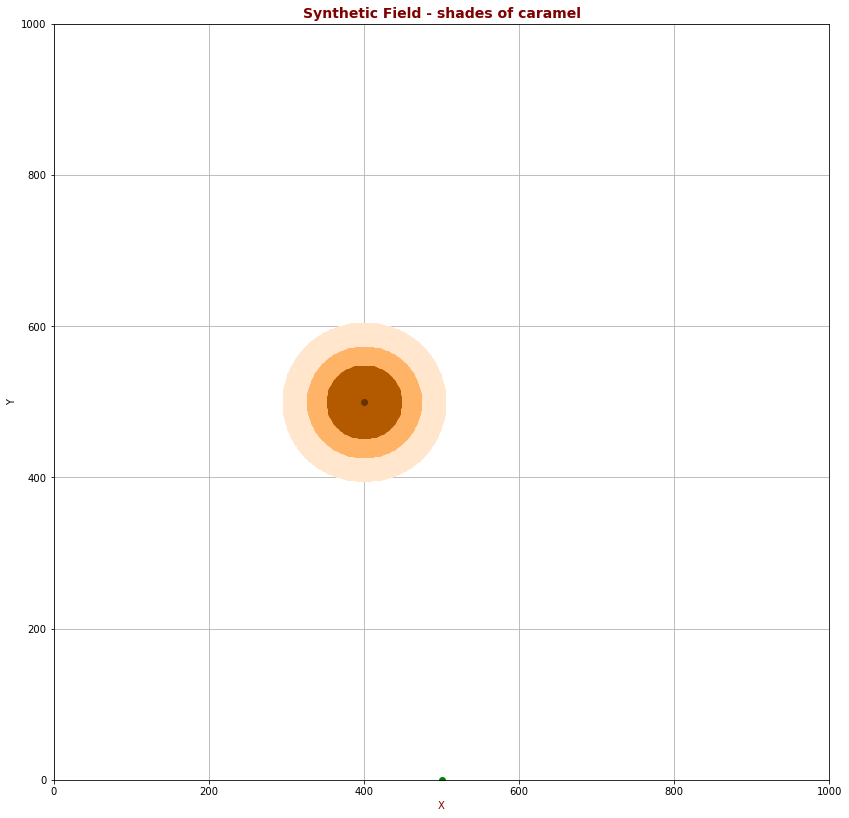

In [12]:
fig= VisualisetionOfSyntheticField(Field, Rover, Grid)
fig.savefig('plot1.png')
fig.clear()

<div class="alert alert-danger">
<b><u>First step, </u></b><br>
in this step ther are two task:<br>
&emsp;<u>First task</u><br> 
&emsp;&emsp;finding the path to pollution area which is identified by reaching a location where the measurement<br> 
&emsp;&emsp;of pollution concentration is at least twice the lower threshold of the sensor sensitivity.<br>
&emsp;<u>Second task</u><br> 
&emsp;&emsp;creating an image of the path to the polluted zone.
</div>

In [13]:
Grid.FindTrackToPollutedZone(Field, Rover)

<div class="alert alert-success">
<b><u>VisualisetionOfFindTrackToPollutedZone</u></b><br>
Is a function that draw an image of the synthetic field plot, and the path to locate the pollution zone.<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure of the field parameters.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalX</i></u>: Is the total discrate nodes in x direction grid.<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalY</i></u>: Is the total discrate nodes in y direction grid.<br>
&emsp;&emsp;&emsp;<u><i>GetXsource()</i></u>: Is the method return the x sourec position.<br>
&emsp;&emsp;&emsp;<u><i>GetYsource()</i></u>: Is the method return the y sourec position.<br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure of the rover.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionLo</i></u>: x vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionLo</i></u>: y vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionMe</i></u>: x vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionMe</i></u>: y vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;&emsp;value sensitivity and less then two third of absulut max pollution value<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionHi</i></u>: x and vector of location with polution values grater then two third<br>
&emsp;&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionHi</i></u>: y vector of location with polution values grater then two third<br>
&emsp;&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;&emsp;<u><i>Rover_track_to_pollution_zone_x</i></u>: x array of path to the pollution zone location.<br>
&emsp;&emsp;&emsp;<u><i>Rover_track_to_pollution_zone_y</i></u>: y array of path to the pollution zone location.<br>
&emsp;&emsp;&emsp;<u><i>Rover_track_in_pollution_zone_x</i></u>: x array of non-repetitive sampling random path in pollution zone.<br>
&emsp;&emsp;&emsp;<u><i>Rover_track_in_pollution_zone_y</i></u>: y array of non-repetitive sampling random path in pollution zone.<br>
<br><b><u>Output</u></b><br>
&emsp;The function returns an object that holds all plot elements and methods. here we use these methods:<br>
&emsp;&emsp;<u><i>show</i></u>: Shoe the current figure<br>
&emsp;&emsp;<u><i>savefig</i></u>: Save the current figure.<br>
&emsp;&emsp;<u><i>clear</i></u>: Clear all memory of the current figure.
</div>

In [14]:
def VisualisetionOfFindTrackToPollutedZone(FieldObject, GridObject):

    px = 1/plt.rcParams['figure.dpi']
    fig, ax= plt.subplots(figsize=(FieldObject.FieldTotalX*px, 
                                   FieldObject.FieldTotalY*px))

    # Pollution
    ax.scatter(GridObject.XxPollutionLo,GridObject.YyPollutionLo,c='#ffe6cc')
    ax.scatter(GridObject.XxPollutionMe,GridObject.YyPollutionMe,c='#ffb366')
    ax.scatter(GridObject.XxPollutionHi,GridObject.YyPollutionHi,c='#b35900')
    ax.scatter(FieldObject.GetXsource(),FieldObject.GetYsource(),c='#663300')

    # Track
    xx= GridObject.Rover_track_to_pollution_zone_x.pop(0)
    yy= GridObject.Rover_track_to_pollution_zone_y.pop(0)
    ax.plot(GridObject.Rover_track_to_pollution_zone_x,
            GridObject.Rover_track_to_pollution_zone_y,color='#00bf00')
    ax.scatter(xx,yy,color='#005f00')
    ax.scatter(GridObject.Rover_track_in_pollution_zone_x,
               GridObject.Rover_track_in_pollution_zone_y,c='#005f00')

    # Axis
    ax.set_xlim(0, FieldObject.FieldTotalX-1)
    ax.set_ylim(0, FieldObject.FieldTotalY-1)
    ax.set_xlabel('X', loc='center', color="darkred")
    ax.set_ylabel('Y', loc='center')
    SamplesInTrack= len(GridObject.Rover_track_to_pollution_zone_x)
    GraphTitle= ("Synthetic Field - shades of brown,   Rover Track - shades of green   "+
                ("\nNumber of samples in track: % d")%SamplesInTrack)
    ax.set_title(GraphTitle, fontsize= 14, fontweight='bold', color='darkred')
    ax.set_axisbelow(True)
    ax.grid(True)

    plt.show()
    return(fig)

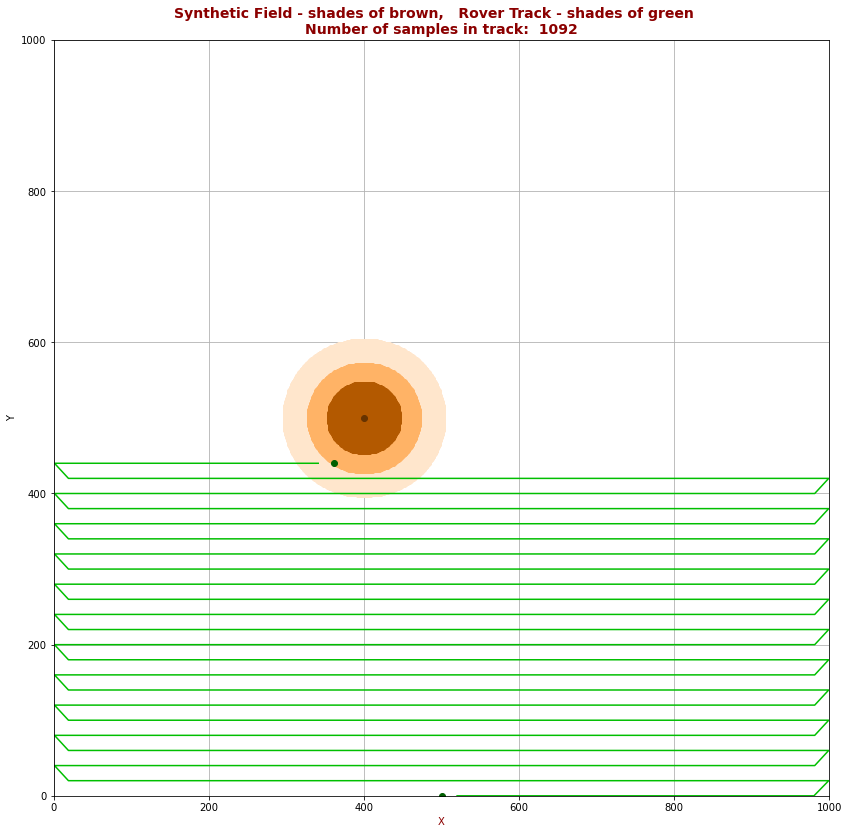

In [15]:
fig= VisualisetionOfFindTrackToPollutedZone(Field, Grid)
fig.savefig('plot2.png')
fig.clear()

In [16]:
# Deleting the array of the rover path to the pollution zone.
Grid.ClearUnnecessaryData()

<div class="alert alert-danger">
<b><u>Third step, </u></b><br>
in this step ther are two task:<br>
&emsp;<u>First task</u><br> 
&emsp;&emsp;finding a random non-repetitive sampling path within the polluted zone.<br>
&emsp;<u>Second task</u><br> 
&emsp;&emsp;creating an image of the path within the polluted zone.
</div>

In [17]:
Grid.FindTrackInPollutedZone(Rover, Max_Steps=30, PrintEnable=True)

ᐅ      0     Yrover=   361.000     Xrover=   440.000     Sampling=     0.022
ᐅ      1     Yrover=   361.000     Xrover=   435.000     Sampling=     0.020
ᐅ      2     Yrover=   356.000     Xrover=   435.000     Sampling=     0.019
ᐅ      3     Yrover=   351.000     Xrover=   435.000     Sampling=     0.018
ᐅ      4     Yrover=   351.000     Xrover=   430.000     Sampling=     0.016
ᐅ      5     Yrover=   346.000     Xrover=   430.000     Sampling=     0.015
ᐅ      6     Yrover=   346.000     Xrover=   435.000     Sampling=     0.016
ᐅ      7     Yrover=   346.000     Xrover=   440.000     Sampling=     0.018
ᐅ      8     Yrover=   351.000     Xrover=   440.000     Sampling=     0.019
ᐅ      9     Yrover=   356.000     Xrover=   440.000     Sampling=     0.021
ᐅ     10     Yrover=   356.000     Xrover=   445.000     Sampling=     0.023
ᐅ     11     Yrover=   351.000     Xrover=   445.000     Sampling=     0.021
ᐅ     12     Yrover=   351.000     Xrover=   450.000     Sampling=     0.023

<div class="alert alert-success">
<b><u>VisualisetionOfFindTrackInPollutedZone</u></b><br>
Is a function that draw an image of the synthetic field plot, and the path to locate the pollution zone.<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure of the field parameters.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalX</i></u>: Is the total discrate nodes in x direction grid.<br>
&emsp;&emsp;&emsp;<u><i>FieldTotalY</i></u>: Is the total discrate nodes in y direction grid.<br>
&emsp;&emsp;&emsp;<u><i>GetXsource()</i></u>: Is the method return the x sourec position.<br>
&emsp;&emsp;&emsp;<u><i>GetYsource()</i></u>: Is the method return the y sourec position.<br>
&emsp;<u><i>Field Object</i></u><br>
&emsp;&emsp;The object contains data structure of the rover.<br>
&emsp;&emsp;The argumant in use are:<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionLo</i></u>: x vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionLo</i></u>: y vector of location with polution values grater then minimum sensor<br>
&emsp;&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionMe</i></u>: x vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionMe</i></u>: y vector of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;&emsp;value sensitivity and less then two third of absulut max pollution value<br>
&emsp;&emsp;&emsp;<u><i>XxPollutionHi</i></u>: x and vector of location with polution values grater then two third<br>
&emsp;&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;&emsp;<u><i>YyPollutionHi</i></u>: y vector of location with polution values grater then two third<br>
&emsp;&emsp;&emsp;absulut max of pollution value sensitivity.<br>
&emsp;&emsp;&emsp;<u><i>Rover_track_in_pollution_zone_x</i></u>: x array of non-repetitive sampling random path in pollution zone.<br>
&emsp;&emsp;&emsp;<u><i>Rover_track_in_pollution_zone_y</i></u>: y array of non-repetitive sampling random path in pollution zone.<br>
<br><b><u>Output</u></b><br>
&emsp;The function returns an object that holds all plot elements and methods. here we use these methods:<br>
&emsp;&emsp;<u><i>show</i></u>: Shoe the current figure<br>
&emsp;&emsp;<u><i>savefig</i></u>: Save the current figure.<br>
&emsp;&emsp;<u><i>clear</i></u>: Clear all memory of the current figure.
</div>

In [18]:
def VisualisetionOfFindTrackInPollutedZone(FieldObject, GridObject):
    px = 1/plt.rcParams['figure.dpi']
    fig, ax= plt.subplots(figsize=(FieldObject.FieldTotalX*px, 
                                   FieldObject.FieldTotalY*px))

    # Pollution
    ax.scatter(GridObject.XxPollutionLo,GridObject.YyPollutionLo,c='#ffe6cc')
    ax.scatter(GridObject.XxPollutionMe,GridObject.YyPollutionMe,c='#ffb366')
    ax.scatter(GridObject.XxPollutionHi,GridObject.YyPollutionHi,c='#b35900')
    ax.scatter(FieldObject.GetXsource(),FieldObject.GetYsource(),c='#663300')

    # Track
    SamplesInTrack= len(GridObject.Rover_track_in_pollution_zone_x)
    ax.plot(GridObject.Rover_track_in_pollution_zone_x,
            GridObject.Rover_track_in_pollution_zone_y,color='#00bf00')
    ax.scatter(GridObject.Rover_track_in_pollution_zone_x[0],
               GridObject.Rover_track_in_pollution_zone_y[0],color='#005f00')

    # Axis
    ax.set_xlabel('X', loc='center', color="darkred")
    ax.set_ylabel('Y', loc='center')
    GraphTitle= ("Synthetic Field - shades of red,   Rover Track - orange   "+
                ("\nNumber of samples in track: % d")%SamplesInTrack)
    ax.set_title(GraphTitle, fontsize= 14, fontweight='bold', color='darkred')
    ax.set_axisbelow(True)
    ax.grid(True)

    plt.show()
    return(fig)

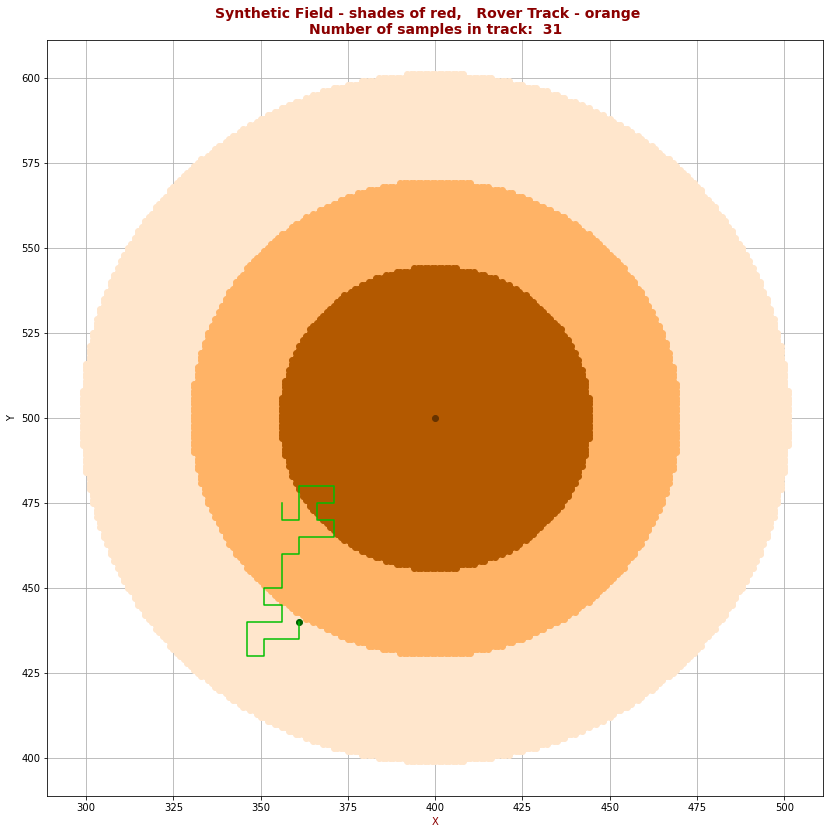

In [19]:
fig= VisualisetionOfFindTrackInPollutedZone(Field, Grid);
fig.savefig('plot3.png')
fig.clear()

In [20]:
del Grid
gf.Print_1H('End')

ᐅ End 
